In [1]:
!python --version

Python 3.7.4


In [ ]:
# Decision Trees

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/UCL_zoo_dataset.csv')

In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
classes = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('class_type', axis=1).drop('animal_name', axis=1), 
    df['class_type'], 
    test_size=0.33, random_state=42
)

In [9]:
len(X_train)

67

In [10]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0


In [11]:
from sklearn import tree

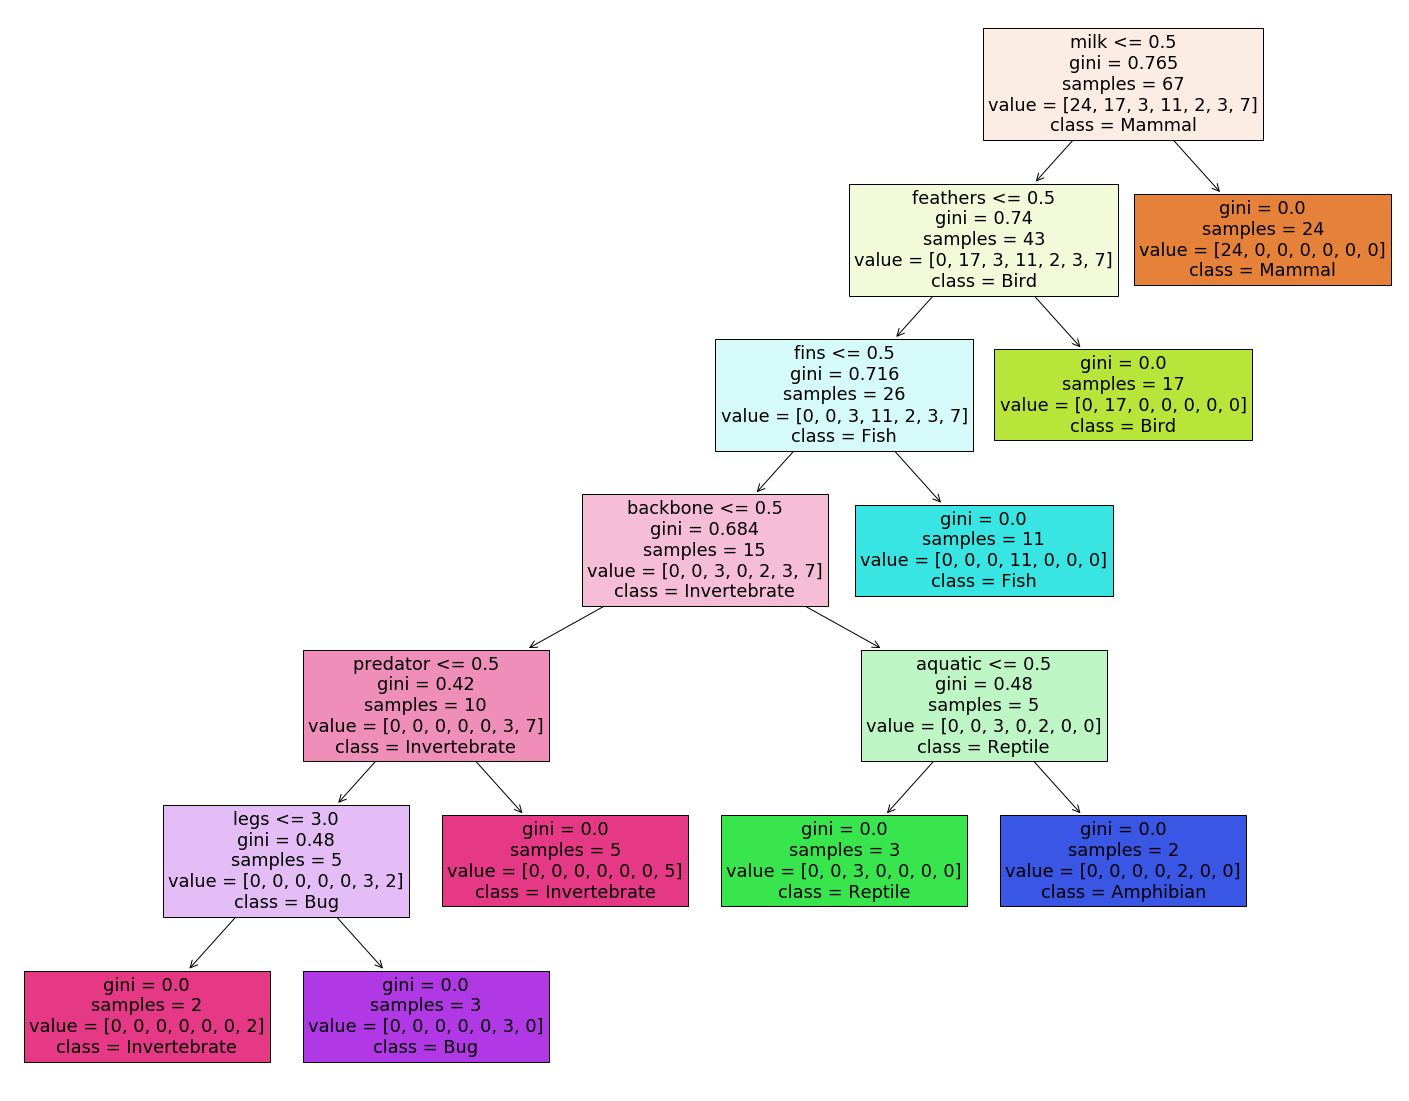

In [12]:
model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

# tree.plot_tree(model)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model, feature_names=X_train.columns, class_names=classes, filled=True)

In [13]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [14]:
pred = model.predict(X_test)

In [15]:
pred[:10]

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test, pred))

[[17  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  3]]


In [18]:
print(classification_report(y_test, pred, target_names=classes))

              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        17
        Bird       1.00      1.00      1.00         3
     Reptile       1.00      0.50      0.67         2
        Fish       1.00      1.00      1.00         2
   Amphibian       0.67      1.00      0.80         2
         Bug       1.00      0.80      0.89         5
Invertebrate       0.75      1.00      0.86         3

    accuracy                           0.94        34
   macro avg       0.92      0.90      0.89        34
weighted avg       0.96      0.94      0.94        34



In [19]:
print("Actual\tPrediction")
y_test = list(y_test)

for i in range(len(y_test[:25])):
    print(f"{classes[y_test[i]-1]}\t{classes[pred[i]-1]}")

Actual	Prediction
Mammal	Mammal
Mammal	Mammal
Mammal	Mammal
Mammal	Mammal
Mammal	Mammal
Bug	Bug
Mammal	Mammal
Mammal	Mammal
Mammal	Mammal
Mammal	Mammal
Fish	Fish
Bug	Bug
Bug	Bug
Bird	Bird
Invertebrate	Invertebrate
Mammal	Mammal
Mammal	Mammal
Bird	Bird
Fish	Fish
Mammal	Mammal
Reptile	Amphibian
Amphibian	Amphibian
Amphibian	Amphibian
Bug	Invertebrate
Mammal	Mammal
